In [1]:
import pandas as pd
import numpy as np
import sys
from itertools import combinations, groupby
from collections import Counter
from IPython.display import display
import json
from fim import apriori, fpgrowth, eclat
import matplotlib.pyplot as plt
import time

# Data preparation

In [2]:
# stage 1
#orders = pd.read_csv('./instacart-market-basket-analysis/order_products__prior.csv')[['order_id','product_id']]
#orders.to_csv('instacart_order.csv', index=False)

In [3]:
# stage 2
#orders = pd.read_csv('instacart_order.csv')
#orders

In [4]:
# stage 3
#orders = orders.groupby('order_id')['product_id'].apply(list)#.to_csv('instacart_transact_list.csv', index=False)

In [5]:
# stage 4 Save list as JSON

#orders_list = orders.values.tolist()

#with open("instacart_transact_list.txt", "w") as fp:
#    json.dump(orders_list, fp)

In [6]:
# stage 5

#with open("instacart_transact_list.txt", "r") as fp:
#    trns_list = json.load(fp)

#products = pd.read_csv('./instacart-market-basket-analysis/products.csv')[['product_id','product_name']]
#products.set_index('product_id', inplace=True)

#productsArr = products.values

#for x in range(len(trns_list)):
#    for y in range(len(trns_list[x])):
#        index = trns_list[x][y] - 1
#        value = productsArr[index][0]
#        trns_list[x][y] = value

#with open("input.txt", "w") as fp:
#    json.dump(trns_list, fp)

## Done

In [7]:
with open("input.txt", "r") as fp:
    transactions = json.load(fp)

In [8]:
transactions

[['Organic Egg Whites',
  'Michigan Organic Kale',
  'Garlic Powder',
  'Coconut Butter',
  'Natural Sweetener',
  'Carrots',
  'Original Unflavored Gelatine Mix',
  'All Natural No Stir Creamy Almond Butter',
  'Classic Blend Cole Slaw'],
 ['Total 2% with Strawberry Lowfat Greek Strained Yogurt',
  'Unsweetened Almondmilk',
  'Lemons',
  'Organic Baby Spinach',
  'Unsweetened Chocolate Almond Breeze Almond Milk',
  'Organic Ginger Root',
  'Air Chilled Organic Boneless Skinless Chicken Breasts',
  'Organic Ezekiel 49 Bread Cinnamon Raisin'],
 ['Plain Pre-Sliced Bagels',
  'Honey/Lemon Cough Drops',
  'Chewy 25% Low Sugar Chocolate Chip Granola',
  'Oats & Chocolate Chewy Bars',
  "Kellogg's Nutri-Grain Apple Cinnamon Cereal",
  'Nutri-Grain Soft Baked Strawberry Cereal Breakfast Bars',
  "Kellogg's Nutri-Grain Blueberry Cereal",
  'Tiny Twists Pretzels',
  'Traditional Snack Mix',
  'Goldfish Cheddar Baked Snack Crackers',
  'Original Orange Juice',
  'Sugarfree Energy Drink',
  'Ener

In [9]:
len(transactions)

3214874

In [10]:
pd.set_option("max_colwidth", 150)

In [11]:
support=0.3
confidence=40
target='rules' 
zmin=2 # антицидент+консеквент
zmax=7 # антицидент+консеквент

# Apriori

In [12]:
start=time.perf_counter()
fi_apriori = apriori(tracts=transactions, target=target, supp=support, conf=confidence, zmin=zmin)
end=time.perf_counter()
print(end-start)

13.99422095599948


In [13]:
df_apriori = pd.DataFrame.from_records(fi_apriori).sort_values(by=[2],ascending=False).reset_index(drop=True)
df_apriori

,0,1,2
0,Bag of Organic Bananas,"(Organic Raspberries, Organic Hass Avocado)",11409
1,Total 2% with Strawberry Lowfat Greek Strained Yogurt,"(Total 2% Lowfat Greek Strained Yogurt With Blueberry,)",9331
2,Total 2% with Strawberry Lowfat Greek Strained Yogurt,"(Total 2% Lowfat Greek Strained Yogurt with Peach,)",8014
3,Icelandic Style Skyr Blueberry Non-fat Yogurt,"(Non Fat Raspberry Yogurt,)",7224
4,Bag of Organic Bananas,"(Apple Honeycrisp Organic, Organic Hass Avocado)",6650
5,Banana,"(Cucumber Kirby, Organic Avocado)",6594
6,Bag of Organic Bananas,"(Organic Large Extra Fancy Fuji Apple, Organic Hass Avocado)",5804
7,Banana,"(Strawberries, Organic Avocado)",5290
8,Organic Zucchini,"(Organic Yellow Squash,)",4992
9,Banana,"(Cucumber Kirby, Organic Strawberries)",4955


# FP-Growth

In [14]:
start=time.perf_counter()
fi_fpgrowth = fpgrowth(tracts=transactions, target=target, supp=support, conf=confidence, zmin=zmin)
end=time.perf_counter()
print(end-start)

12.227118065999093


In [15]:
df_fpgrowth = pd.DataFrame.from_records(fi_fpgrowth).sort_values(by=[2],ascending=False).reset_index(drop=True)
df_fpgrowth

,0,1,2
0,Bag of Organic Bananas,"(Organic Raspberries, Organic Hass Avocado)",11409
1,Total 2% with Strawberry Lowfat Greek Strained Yogurt,"(Total 2% Lowfat Greek Strained Yogurt With Blueberry,)",9331
2,Total 2% with Strawberry Lowfat Greek Strained Yogurt,"(Total 2% Lowfat Greek Strained Yogurt with Peach,)",8014
3,Icelandic Style Skyr Blueberry Non-fat Yogurt,"(Non Fat Raspberry Yogurt,)",7224
4,Bag of Organic Bananas,"(Apple Honeycrisp Organic, Organic Hass Avocado)",6650
5,Banana,"(Cucumber Kirby, Organic Avocado)",6594
6,Bag of Organic Bananas,"(Organic Large Extra Fancy Fuji Apple, Organic Hass Avocado)",5804
7,Banana,"(Strawberries, Organic Avocado)",5290
8,Organic Zucchini,"(Organic Yellow Squash,)",4992
9,Banana,"(Cucumber Kirby, Organic Strawberries)",4955


# ECLAT

In [16]:
start=time.perf_counter()
fi_eclat = eclat(tracts=transactions, target=target, supp=support, conf=confidence, zmin=zmin)
end=time.perf_counter()
print(end-start)

12.193124739000268


In [17]:
df_fi_eclat = pd.DataFrame.from_records(fi_eclat).sort_values(by=[2],ascending=False).reset_index(drop=True)
df_fi_eclat

,0,1,2
0,Bag of Organic Bananas,"(Organic Raspberries, Organic Hass Avocado)",11409
1,Total 2% with Strawberry Lowfat Greek Strained Yogurt,"(Total 2% Lowfat Greek Strained Yogurt With Blueberry,)",9331
2,Total 2% with Strawberry Lowfat Greek Strained Yogurt,"(Total 2% Lowfat Greek Strained Yogurt with Peach,)",8014
3,Icelandic Style Skyr Blueberry Non-fat Yogurt,"(Non Fat Raspberry Yogurt,)",7224
4,Bag of Organic Bananas,"(Apple Honeycrisp Organic, Organic Hass Avocado)",6650
5,Banana,"(Cucumber Kirby, Organic Avocado)",6594
6,Bag of Organic Bananas,"(Organic Large Extra Fancy Fuji Apple, Organic Hass Avocado)",5804
7,Banana,"(Strawberries, Organic Avocado)",5290
8,Organic Zucchini,"(Organic Yellow Squash,)",4992
9,Banana,"(Cucumber Kirby, Organic Strawberries)",4955


## Association rules

In [18]:
df_fi_eclat.values.tolist()

[['Bag of Organic Bananas',
  ('Organic Raspberries', 'Organic Hass Avocado'),
  11409],
 ['Total 2% with Strawberry Lowfat Greek Strained Yogurt',
  ('Total 2% Lowfat Greek Strained Yogurt With Blueberry',),
  9331],
 ['Total 2% with Strawberry Lowfat Greek Strained Yogurt',
  ('Total 2% Lowfat Greek Strained Yogurt with Peach',),
  8014],
 ['Icelandic Style Skyr Blueberry Non-fat Yogurt',
  ('Non Fat Raspberry Yogurt',),
  7224],
 ['Bag of Organic Bananas',
  ('Apple Honeycrisp Organic', 'Organic Hass Avocado'),
  6650],
 ['Banana', ('Cucumber Kirby', 'Organic Avocado'), 6594],
 ['Bag of Organic Bananas',
  ('Organic Large Extra Fancy Fuji Apple', 'Organic Hass Avocado'),
  5804],
 ['Banana', ('Strawberries', 'Organic Avocado'), 5290],
 ['Organic Zucchini', ('Organic Yellow Squash',), 4992],
 ['Banana', ('Cucumber Kirby', 'Organic Strawberries'), 4955],
 ['Banana', ('Strawberries', 'Large Lemon'), 4829],
 ['Banana', ('Honeycrisp Apple', 'Organic Avocado'), 4814],
 ['Icelandic Style S

In [19]:
df_fi_eclat.values.tolist()[0]

['Bag of Organic Bananas',
 ('Organic Raspberries', 'Organic Hass Avocado'),
 11409]

In [20]:
df_fi_eclat.values.tolist()[-1]

['Bag of Organic Bananas', ('Organic Lemon', 'Organic Raspberries'), 4073]

# Фиксированный набор данных, изменяемый порог поддержки

In [21]:
confs = [5, 10, 20, 30, 40, 44]

a = []
fp = []
e = []

fi_fpgrowth=[]

fr_it_set_size = []          # 2
fi_it_set_max_len = []       # 3
num_of_unique_fr_it_set = [] # 4

In [22]:
for conf in confs:
    start_a = time.perf_counter()
    fi_apriori = apriori(tracts=transactions, target=target, supp=support, conf=conf, zmin=zmin)
    end_a = time.perf_counter()
    
    start_fp = time.perf_counter()
    fi_fpgrowth = fpgrowth(tracts=transactions, target=target, supp=support, conf=conf, zmin=zmin)
    end_fp = time.perf_counter()
    
    #### 2.
    
    fr_it_set_size.append(len(fi_fpgrowth))
    
    #### 3
    
    size=[0,]
    for i in range(len(fi_fpgrowth)):
        size.append( len(fi_fpgrowth[i][0])+len(fi_fpgrowth[i][0]) )
    fi_it_set_max_len.append(max(size))
    
    #### 4
    
    fi_fpgrowth = fpgrowth(tracts=transactions, target=target, supp=support, conf=conf, zmin=zmin, zmax=7) 
    num_of_unique_fr_it_set.append(len(fi_fpgrowth))
    
    ####
    
    start_e = time.perf_counter()
    fi_e = eclat(tracts=transactions, target=target, supp=support, conf=conf, zmin=zmin)
    end_e = time.perf_counter()
    
    a.append(end_a-start_a)
    fp.append(end_fp-start_fp)
    e.append(end_e-start_e)

### 1. Сравнение быстродействия алгоритмов 

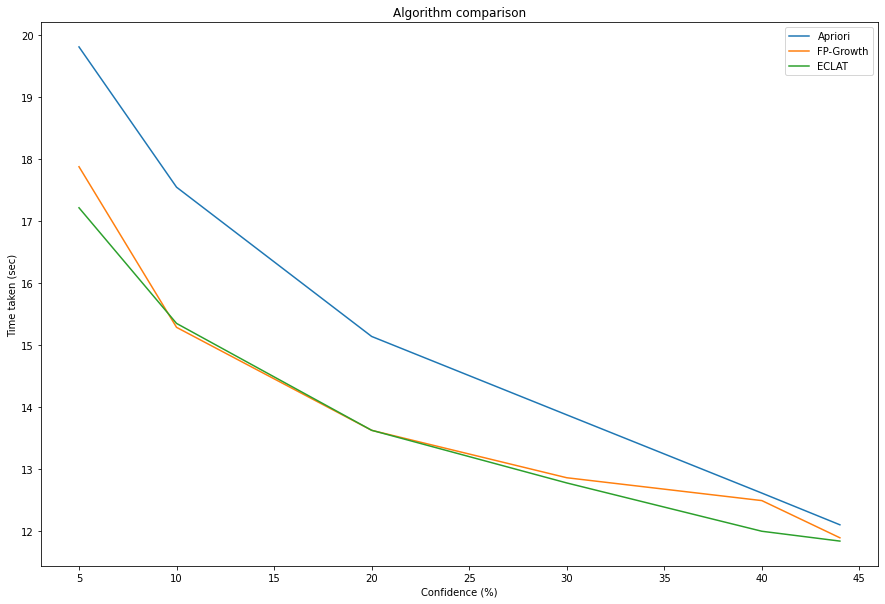

In [23]:
plt.plot(confs, a, label = "Apriori")
plt.plot(confs, fp, label = "FP-Growth")
plt.plot(confs, e, label = "ECLAT")

plt.xlabel('Confidence (%)')
plt.ylabel('Time taken (sec)')
plt.title('Algorithm comparison')
plt.legend(loc='best')

fig = plt.gcf()
fig.set_size_inches(15,10) 

plt.show()

In [24]:
print("Apriori:    FP-Growth:   ECLAT:")
for i in range(len(a)):
    print( "{:7.2f} {:13.2f} {:8.2f}".format(a[i],fp[i],e[i]) )

Apriori:    FP-Growth:   ECLAT:
  19.81         17.88    17.22
  17.55         15.29    15.35
  15.14         13.63    13.63
  13.88         12.86    12.78
  12.62         12.50    12.00
  12.11         11.90    11.84


### 2. Общее количество найденных правил

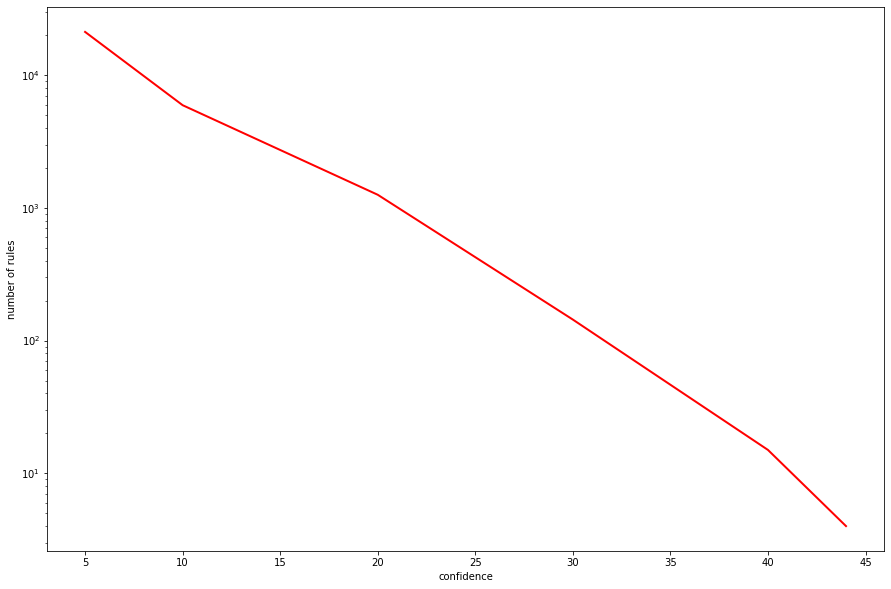

In [25]:
plt.plot(confs, fr_it_set_size, color='red', lw=2)

plt.xlabel('confidence')
plt.ylabel('number of rules')
plt.yscale('log')

fig = plt.gcf()
fig.set_size_inches(15,10)

plt.show()

In [26]:
print(confs)
print(fr_it_set_size)

[5, 10, 20, 30, 40, 44]
[21199, 5943, 1256, 144, 15, 4]


### 3. Максимальное количество объектов в правиле

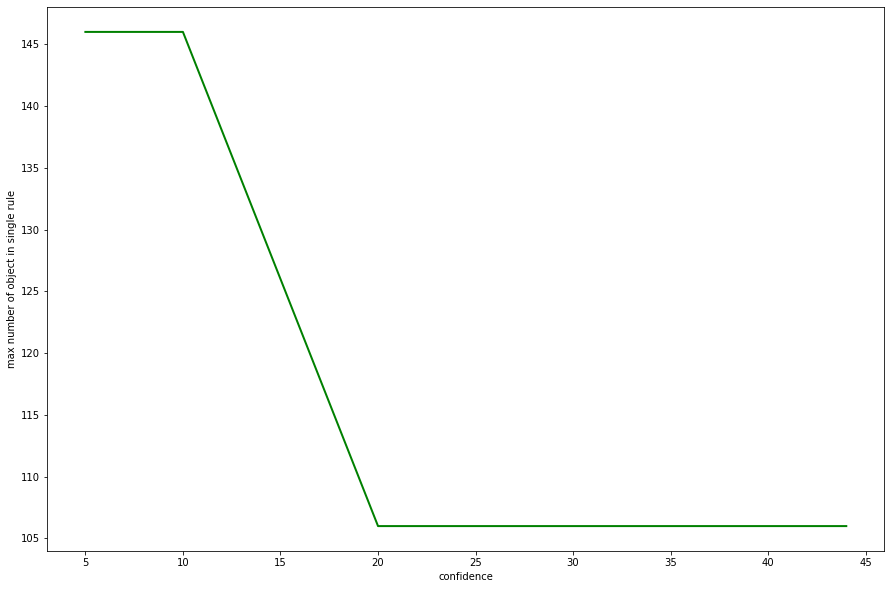

In [27]:
plt.plot(confs, fi_it_set_max_len, color='green', lw=2)

plt.xlabel('confidence')
plt.ylabel('max number of object in single rule')

fig = plt.gcf()
fig.set_size_inches(15,10) 

plt.show()

### 4. Количество правил, в которых антецедент и консеквент суммарно включают в себя не более семи объектов

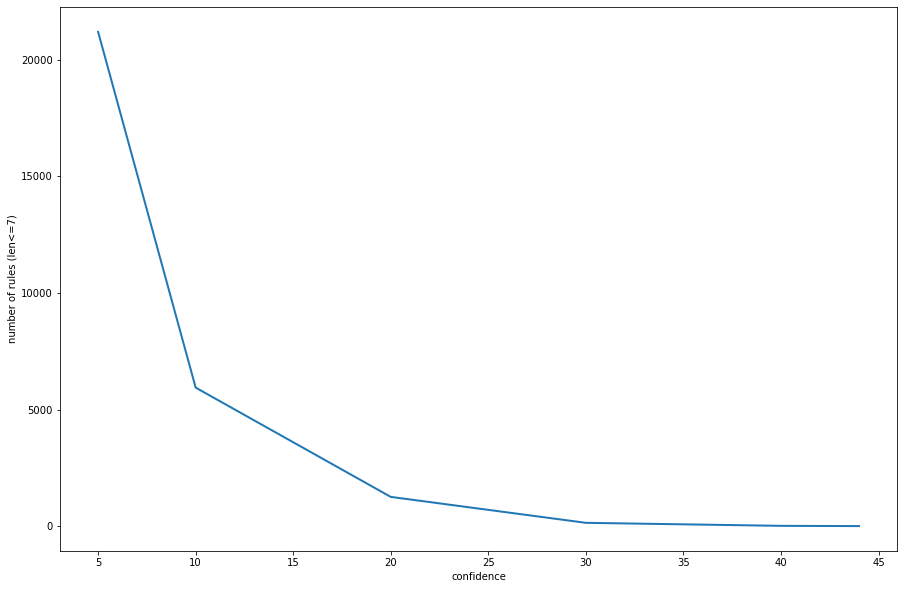

In [28]:
plt.plot(confs, num_of_unique_fr_it_set, lw=2)

plt.xlabel('confidence')
plt.ylabel('number of rules (len<=7)')

fig = plt.gcf()
fig.set_size_inches(15,10) 

plt.show()